<a href="https://colab.research.google.com/github/ShoroogH/SSAZ/blob/master/FaceRecognition_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Recognition

- **Author:** [Bdour Alharbi](https://twitter.com/Bdour_Ebrahim)
- **Date:** June 7, 2020

In this practic, you will build a system for an office building where the building manager would like to offer facial recognition to allow the employees to enter the building.
This code from [Adrian Rosebrock](https://www.pyimagesearch.com/2018/06/18/face-recognition-with-opencv-python-and-deep-learning/) tutorial using [Face Recognition](https://github.com/ageitgey/face_recognition) library. 



![alt text](https://www.starlinkindia.com/blog/wp-content/uploads/2019/05/Biometrics-Face-Recognition-How-Does-it-work.jpg)



##How does deep learning imporve face recognition ?


- **Using a ConvNet to compute encodings:**

 dlib facial recognition network is based on ResNet-34 . by using 128-neuron fully connected layer as its last layer, the network will encodes a face image into a vector of 128 numbers. You then use the encodings to compare two face images.

- **Triplet loss function:** 

 The triplet loss function tries to "push" the encodings of two images of the same person  closer together, while "pulling" the encodings of two images of different persons further apart.



![alt text](https://pyimagesearch.com/wp-content/uploads/2018/06/face_recognition_opencv_triplet.jpg)


## Load packages
#### Required packages : 
- face recognition :

 since training requires a lot of data and a lot of computation, we won't train it from scratch here. Instead, we load a previously trained model. 

- CV2 : OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software librar 

In [0]:
!pip install face-recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=fb73a00fffb2c1feb344ca660d88910ebbe58eefd8249340e357cfbf2ee8f88d
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
# import the necessary packages
from imutils import paths
import face_recognition
import random
import cv2
import os
from google.colab.patches import cv2_imshow

# A - Face detection and extraction


**1- Face detection and extraction**


Let's build a database containing the embeddings for each person who is allowed to enter the office. To generate the encoding we will use algorithm that will do the following : 
- check if images in dataset contain faces and 5 landmarks (two eyes, nose and mouth corners). 
- crope all faces in the image and converte them to RGB. 
- use a deep learning feature extractor to generate a 128-D vector describing a face. 
- build the database (represented as a python dictionary) to save embeddings. This database maps each person's name to a 128-dimensional encoding of their face.

Saudi players dataset Download link : https://github.com/bdourE/Saudi_Players_Dataset





In [0]:
!git clone  https://github.com/bdourE/Saudi_Players_Dataset.git

Cloning into 'Saudi_Players_Dataset'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (178/178), done.
remote: Total 193 (delta 15), reused 193 (delta 15), pack-reused 0
Receiving objects: 100% (193/193), 2.64 MiB | 5.03 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [0]:
imagePaths = list(paths.list_images("/content/Saudi_Players_Dataset/Saudi_Players"))

original image


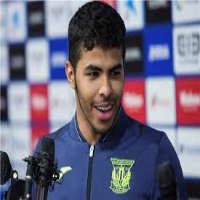

cropped image


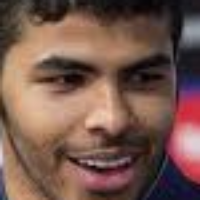

(128,)
[array([-0.15090498,  0.14170703,  0.02871101, -0.01248709, -0.04587295,
       -0.06751041,  0.03474311, -0.03118943,  0.18182835, -0.0303255 ,
        0.20621036, -0.06473188, -0.21719195, -0.10885874, -0.0908597 ,
        0.06944197, -0.15896028, -0.08055057, -0.01454188, -0.01840602,
        0.12179287, -0.00890128,  0.0321484 ,  0.09641188, -0.07922787,
       -0.31173497, -0.05455881, -0.16859707,  0.00940212, -0.14514264,
        0.05615255,  0.02179917, -0.22723052, -0.10624664, -0.07001739,
       -0.00853334,  0.00900816,  0.05797398,  0.11324456, -0.07316124,
       -0.16074748, -0.01622808,  0.05499117,  0.22748248,  0.1311731 ,
        0.09629214, -0.0312846 , -0.05409704,  0.05113681, -0.21357217,
       -0.00616162,  0.12967324,  0.07941462,  0.01106345,  0.06390825,
       -0.17143944,  0.00444183,  0.0267994 , -0.16775408,  0.08852643,
        0.00401764, -0.00368776, -0.00195436,  0.05144566,  0.13551769,
        0.027178  , -0.05673083, -0.1467917 ,  0.1141924

In [0]:
r = random.randint(1,len(imagePaths)-1)
dim = (200,200)
Path = imagePaths[r]
image = cv2.imread(Path)
resized = cv2.resize(image, dim)
print("original image")
cv2_imshow(resized)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
boxes = face_recognition.face_locations(rgb,model="detection_method")
for (top, right, bottom, left) in boxes:
  face = image[top :bottom , left :right ]
  resized = cv2.resize(face, dim)
  print("cropped image")
  cv2_imshow(resized)

encodings = face_recognition.face_encodings(rgb, boxes)
print(encodings[0].shape)
print(encodings)




In [0]:
# initialize the list of known encodings and known names
knownEncodings = []
knownNames = []
# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
	# extract the person name from the image path
	print("[INFO] processing image {}/{}".format(i + 1,
		len(imagePaths)))
	name = imagePath.split(os.path.sep)[-2]
  
	# load the input image and convert it from RGB (OpenCV ordering)
	# to dlib ordering (RGB)
	image = cv2.imread(imagePath)
	rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

	# detect the (x, y)-coordinates of the bounding boxes
	# corresponding to each face in the input image
	boxes = face_recognition.face_locations(rgb,
		model="detection_method")
 
	# compute the facial embedding for the face
	encodings = face_recognition.face_encodings(rgb, boxes)

	# loop over the encodings
	for encoding in encodings:
		# add each encoding + name to our set of known names and
		# encodings
		knownEncodings.append(encoding)
		knownNames.append(name)


data = {"encodings": knownEncodings, "names": knownNames}

[INFO] processing image 1/140
[INFO] processing image 2/140
[INFO] processing image 3/140
[INFO] processing image 4/140
[INFO] processing image 5/140
[INFO] processing image 6/140
[INFO] processing image 7/140
[INFO] processing image 8/140
[INFO] processing image 9/140
[INFO] processing image 10/140
[INFO] processing image 11/140
[INFO] processing image 12/140
[INFO] processing image 13/140
[INFO] processing image 14/140
[INFO] processing image 15/140
[INFO] processing image 16/140
[INFO] processing image 17/140
[INFO] processing image 18/140
[INFO] processing image 19/140
[INFO] processing image 20/140
[INFO] processing image 21/140
[INFO] processing image 22/140
[INFO] processing image 23/140
[INFO] processing image 24/140
[INFO] processing image 25/140
[INFO] processing image 26/140
[INFO] processing image 27/140
[INFO] processing image 28/140
[INFO] processing image 29/140
[INFO] processing image 30/140
[INFO] processing image 31/140
[INFO] processing image 32/140
[INFO] processing

# B- Recognize faces  


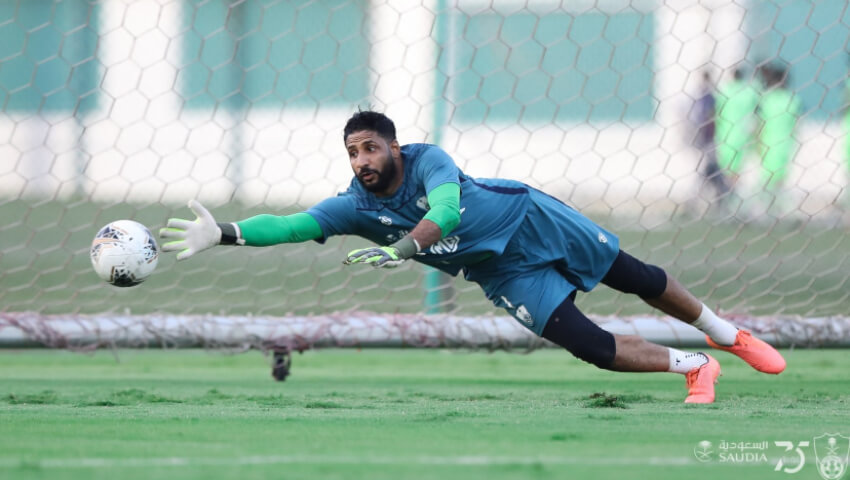

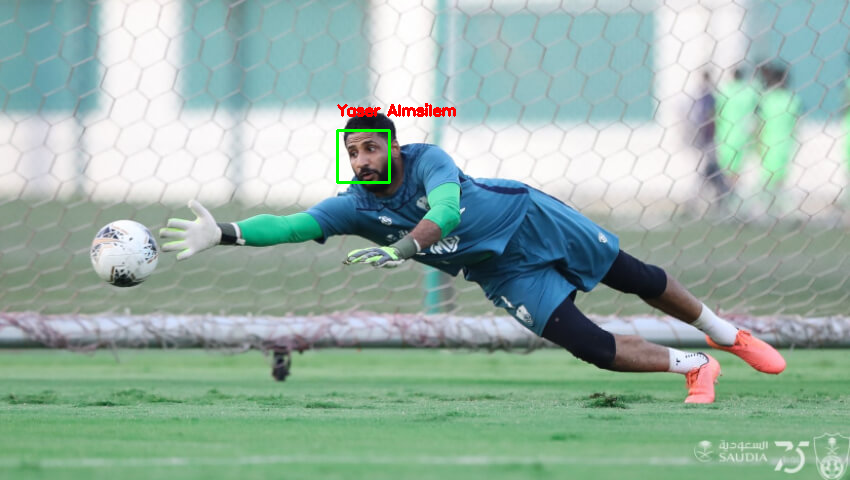

In [0]:
# load the input image and convert it from BGR to RGB
image = cv2.imread("/content/Saudi_Players_Dataset/Test Images/ياسر-المسيليم-2.jpg")
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(image)
boxes = face_recognition.face_locations(rgb,
	model="detection_method")
encodings = face_recognition.face_encodings(rgb, boxes)
# initialize the list of names for each face detected
names = []

# loop over the facial embeddings
for encoding in encodings:
	# attempt to match each face in the input image to our known
	# encodings
	matches = face_recognition.compare_faces(data["encodings"],
		encoding)
	name = "Unknown"

	# check to see if we have found a match
	if True in matches:
		# find the indexes of all matched faces then initialize a
		# dictionary to count the total number of times each face
		# was matched
		matchedIdxs = [i for (i, b) in enumerate(matches) if b]
		counts = {}

		# loop over the matched indexes and maintain a count for
		# each recognized face face
		for i in matchedIdxs:
			name = data["names"][i]
			counts[name] = counts.get(name, 0) + 1

		# determine the recognized face with the largest number of
		# votes (note: in the event of an unlikely tie Python will
		# select first entry in the dictionary)
		name = max(counts, key=counts.get)
	
	# update the list of names
	names.append(name)
 
 # loop over the recognized faces
for ((top, right, bottom, left), name) in zip(boxes, names):
	# draw the predicted face name on the image
	cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
	y = top - 15 if top - 15 > 15 else top + 15
	cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
		0.50, (0, 0, 255), 2)
 
 # show the output image
cv2_imshow(image)

#### Ways to improve your facial recognition model

- Build your Deep learning model that generate larger embeddings -for ex : 512 or 1024 - that extract more features from faces . 
- Put more images of each person (under different lighting conditions, taken on different days, etc.) into the database. Then given a new image, compare the new face to multiple pictures of the person. This would increase accuracy.
- Use anotherlose function that achieve more accurate prediction like ArcFace loss or insight face.